In [ ]:
# 금요일 수업 종료까지

# 1. 
# 타이타닉 생존 예측 프로그램 
# 제출 파일 3개 압축 후 개인 카톡 제출 awesomeclass
# Titanic.ui, Titanic.exe. Titanic.py

# 2. 
# 데이콘 타이타닉 생존 예측 경진대회 제출후
# 본인 점수 캡처 사진 1장 

# 1,2 모두 수행 하면 모두 상품 지급
# 데이콘 최고 점수 1명은 추가 업그레이드


Titanic 생존자 예측


In [ ]:
# 가족과 함께 탑승한 1등실 21세 남성의 생존 확률은 얼마일까...
# 홀로 탑승한 3등실 20세 여성의 생존 확률은 얼마일까...

In [ ]:
import numpy as np                # 계산 관련 모듈
import pandas as pd               # 분석 관련 모듈
import matplotlib.pyplot as plt   # 기본 그림 관련 모듈
import seaborn as sns             # 고급 그림 관련 모듈

In [ ]:
raw_data = pd.read_excel('titanic.xls')   # 판다스로 엑셀 파일 읽어오기
raw_data.info()                           # 데이터프레임의 대략적인 정보 확인하기

# 각 데이터열의 의미 확인
# pclass    선실의 등급 1등실이 가장 비싸고 3등실이 가장 저렴
# survived  생존여부 1이 생존 0이 사망
# age       나이
# sibsp     함께 탑승한 형제자매나 배우자의 수
# parch     함께 탑승한 부모 또는 자녀의 수
# fare      탑승 요금

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
# 데이터 살펴보기

raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
raw_data.describe()    # 데이터 프레임의 대략 적인 통계적 정보를 확인할수 있다. 
                       # 숫자로 이루어진 열만 확인 가능하다. 
                       # 나이의 경우 80세가 최고령이고 0.16살 즉 갓난아이도 탑승했다

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


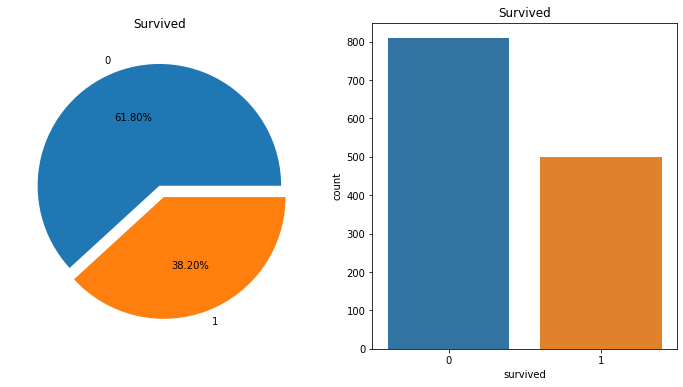

In [ ]:
f,ax = plt.subplots(1,2,figsize=(12,6))  
# matplotlib 로 한번에 2개의 그래프롤 표현하고 
# 1, 2는 1행 2열 의미하고 figsize=(12,6)  가로 * 세로의 크기를 의미한다. 
# f와 ax 전체 기본 프레임과 그 위에 올라가는 그림을 나타낸다.  

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],
                                             autopct='%1.2f%%',ax=ax[0])
# raw_data 에 있는 survived 정보 즉 생존정보를 파이 그래프로 그린다. 
# value_counts() 1생존의 수와 0사망의 수
# explode=[0,0.1] 값 사이의 여백 설정(파이가 떨어지게게)
# autopct='%1.2f%%' 자동으로 1과 0의  퍼센트 값을 계산하여 2자리의 소수점 아래까지 % 붙여서 표현
# ax=ax[0] 2개 의 자리중 1번째 즉 왼쪽에 위치치

ax[0].set_title('Survived')  # 제목설정
ax[0].set_ylabel('')         # 라벨 제거거

# 여기서부터는 오른쪽 2번째 그림림
sns.countplot(x='survived', data=raw_data, ax=ax[1])  # sns seaborn 으로 그림을 표현
ax[1].set_title('Survived')   # 제목설정
plt.show()

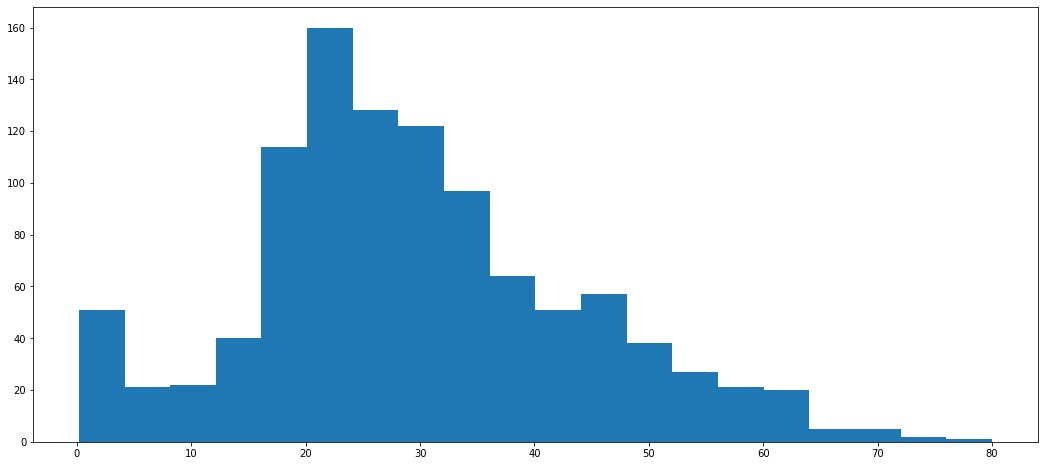

In [ ]:
raw_data['age'].hist(bins=20,figsize=(18,8),grid=False);

# 전체 탑승객들의 정보에서 age즉 나이 만으로 히스토그램
# 특히 주목할 점은 0살대 아기들이 상당히 많은 것을 볼수 있다. 
# 가장 많은 인원수는 20대 초반으로 보인다. 

# 실제 역사상으로도 타이타닉에는 아메리칸 드림을 가지고 아기를 안고 가족단위로
# 많이 탑승했다고 한다. 

In [ ]:
raw_data.groupby('pclass').mean()

# groupby 를 사용하여 선실의 등급의 평균균을 살펴 본다. 
# 가장 비싼 1등실의 생존률이 61%로 상당히 높은 것을 볼 수 있다. 

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [ ]:
raw_data.corr()

# corr() 함수는 상관계수를 계산해 주는 함수이다. 각 열들의 상호 상관계수를 확인할수 있다. 

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


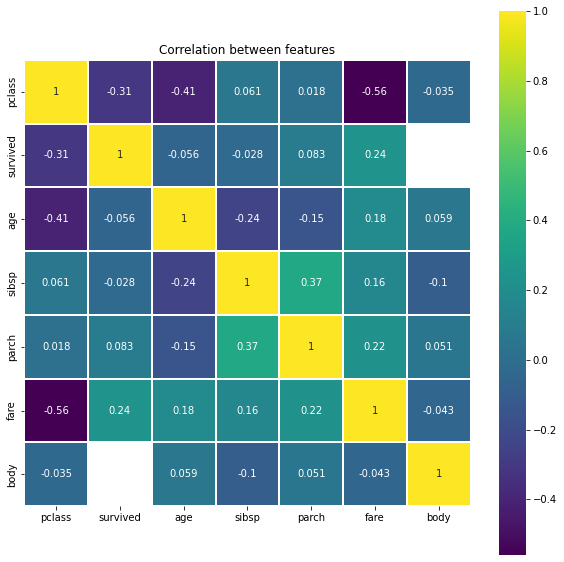

In [ ]:
plt.figure(figsize=(10, 10))
# 기본 틀

sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")

# seaborn 의 heatmap 으로 데이터는 상관계수 corr() 
# annot=True 값 숫자 표시  cmap 컬러 색상상
plt.title('Correlation between features')
# 그림의 제목 설정

plt.show()

# 상관계수는 두 데이터의 상관관계만을 계산한 것으로 인과관계로 해석하면 안된다. 
# 선실 등급이 낮을수록 생존율이 높다는 것과 -31% 는 것과 요금이 높을수로 
# 생존률이 높다는 것을 쉽게 그림으로 확인할수 있다. 

In [ ]:
raw_data['age_cat'] = pd.cut(raw_data['age'], 
                             bins=[0, 3, 7, 15, 30, 60, 100], 
                             include_lowest=True, 
                             labels=['baby', 'children', 'teenage', 
                                     'young', 'adult', 'old'])
raw_data.head()

# 나이 등급 열을 하나 새로만들어서 관찰해 보자. 
# pandas 에 있는 cut 함수를 사용하여 나이 구분 기준을 만들어 각각 라벨을 붙였다. 
# 0살부터 3살까지는 baby 3~7살 까지는 children ..........
# include_lowest=True, 옵션은 제일 작은 값이 '초과'의 개념에서 빠지지 않게 포함 시키는 옵션

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [ ]:
raw_data.groupby('age_cat').mean()

# baby 등급의 경우 pclass 평균이 2.58 즉 3등실에 많이 있음을 보여준다. 
# 따라서 생존률이 낮아야 하는데 최종 결과를 보면 baby 일수록 생존률이 높다. 
# adult 나 old 로 갈수로 1등실에 많이 탑승하였지만 생존률이 낮아짐을 볼수 있다. 

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


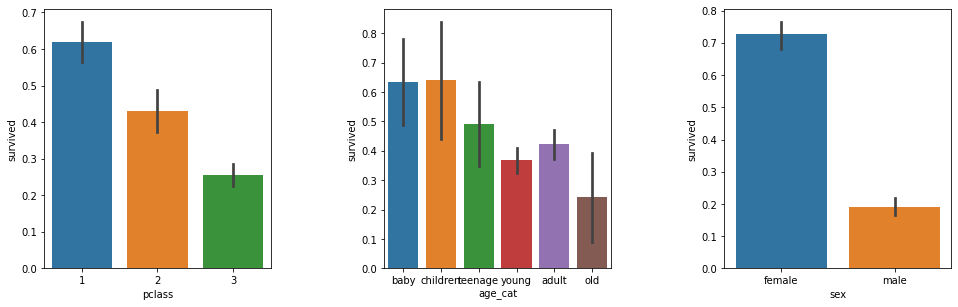

In [ ]:
plt.figure(figsize=[14,4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data=raw_data)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)
plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

# 나이가 어릴수록 생존율이 높으것을 볼수 있고 특히 여성의 생존률이 월등히 높음을 볼수 있다. 
# 사고시 여성, 아이 등을 먼저 구출한다는 원칙이 잘 지켜진 결과로 볼수 있다. 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


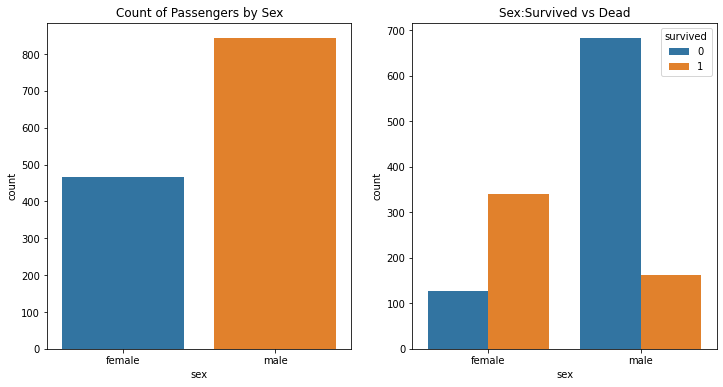

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('sex',data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot(x='sex',hue='survived',data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

# 여성의 탑승 객 수는 약 450명정도이고 남성은 약 850명 정도로 여성이 남성의 반정도 이다. 
# 그런데 생존자 수를 살펴보면  여성의 월등히 많이 생존하였음을 볼수 있다. 

In [ ]:
boat_survivors = raw_data[raw_data['boat'].notnull()]
boat_survivors.head()

# 보트 번호가 있으면 구명 보트에 탑승한 사람이다. 
# 결측치는 제외한 데이터로만 즉 nan이 아닌 항목만 선택



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


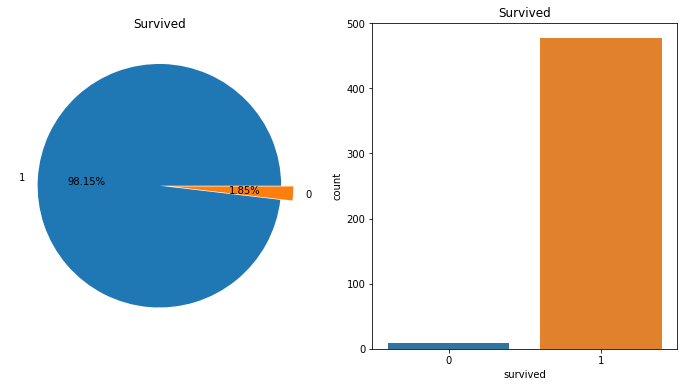

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1],
                                                   autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=boat_survivors,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

# 구명 보트에 탑승한 사람은 생존률이 98.15% 이다. 상당히 높음을 볼수 있다. 
# 오히려 이항목 즉 보트 항목은 인공지능을 학습 시킬때 포함하면 안된다. 
# 분별력이 떨어진다. 

In [ ]:
# 사회적 지위에 따른 생존률
raw_data['name']

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

In [ ]:
raw_data['name'][0]
# name 열에는 이름뿐 아니라 사회적 지위도 포함되어 있다. 

'Allen, Miss. Elisabeth Walton'

In [ ]:
raw_data['name'][0].split(',')[1]
# 항상 두번째 단어가 사회적 지위이기때문에 

' Miss. Elisabeth Walton'

In [ ]:
raw_data['name'][0].split(',')[1].split('.')[0]
# 쉼표 뒤부터 마침표 앞까지가 사회적 지위를 나타낸다. 

' Miss'

In [ ]:
raw_data['name'][0].split(',')[1].split('.')[0].strip()

# 빈칸 까지 제거하여 한사람의 사회적 지위를 추출하였다. 

'Miss'

In [ ]:
conversion_rare = lambda x: x.split(',')[1].split('.')[0].strip()
raw_data['title'] = raw_data['name'].map(conversion_rare)

titles = raw_data['title'].unique()
titles

# 이름에서 분리한 사회적 지위만으로 새로운 열 title 을 추가하였다.  

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [ ]:
pd.crosstab(raw_data['title'], raw_data['sex'])
# 각 지위별 남여 분리하여 개수 파악
# 판다스의 크로스탭은 지정된 컬럼을 인수로 하여 두번째 지정된 칼럼에 대한 개수를 알려준다. 


sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [ ]:
raw_data['title'] = raw_data['title'].replace('Mlle', 'Miss')
#Mlle 를 Miss로 변경하고

raw_data['title'] = raw_data['title'].replace('Ms', 'Miss')
#Ms 를 Miss로 변경하고

raw_data['title'] = raw_data['title'].replace('Mme', 'Mrs')
#Mme 를 Mrs로 변경하고

Rare = ['Lady','the Countess','Countess','Capt', 'Master',
        'Col','Don','Dr','Major','Rev','Sir','Jonkheer', 'Dona']

for each in Rare:
    raw_data['title'] = raw_data['title'].replace(each, 'Rare')
    
raw_data['title'].unique()

array(['Miss', 'Rare', 'Mr', 'Mrs'], dtype=object)

In [ ]:
print (raw_data[['title', 'survived']].groupby(['title'], as_index=False).mean())

  title  survived
0  Miss  0.678030
1    Mr  0.162483
2   Mrs  0.787879
3  Rare  0.466667


In [ ]:
raw_data['sex']

# 데이터 형이 숫자가 아니면 모델링을 할수 없다. 따라서 성을 숫자로 변경하자. 


0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: object

In [ ]:
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(0)
    elif each == 'male':
        tmp.append(1)
    else:
        tmp.append(np.nan)

# 여성은 0으로 남성은 1로 성별을 숫자(최종 float)로 바꾼다.    
# 머신러닝 알고리즘을 적용하려면 열값은 항상 숫자이어야만 한다. (그래야 계산이 가능해진다. )     

In [ ]:
raw_data['sex'] = tmp
raw_data['sex']

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Name: sex, Length: 1309, dtype: int64

In [ ]:
raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [ ]:
raw_data.info()

# 머신러닝 알고리즘 적용시에는 반드시 결측치가 없어야 한다. 
# 결측치를 제거하는 방법 중
# 삭제, 대체 등등

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   float64 
 2   name       1309 non-null   object  
 3   sex        1309 non-null   float64 
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
dtypes: category(1), float64(8), object(7)
memory usage: 155.0+ KB


In [ ]:
# 결측치 제거의 방법 중 삭제를 적용하여 데이터의 수가 줄어든것을 볼수 있다. 
# 1309 -> 1045 개개

raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float64 
 1   survived   1045 non-null   float64 
 2   name       1045 non-null   object  
 3   sex        1045 non-null   float64 
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float64 
 6   parch      1045 non-null   float64 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
dtypes: category(1), float64(8), object(7)
memory usage: 131.9+ KB


In [ ]:
# 예측 모델 만들기

train_pre = raw_data[['pclass','sex','age','sibsp','parch','fare']]
train_pre.head()

# 예측 모델을 만드는데 모든 열값을 사용할 필요는 없다. 
# 따라서 문자로 이루어진 열이나 또는 숫자라도 변별력에 문제가 있는 열은 제외한다. 

,pclass,sex,age,sibsp,parch,fare
0,1.0,0.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,1.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500


In [ ]:
# 전체 데이터를 학습용train과 검증용test으로 나누어야 한다. 9:1
from sklearn.model_selection import train_test_split
# 전체 데이터를 나누어주는 모듈듈

X_train, X_test, y_train, y_test = train_test_split(train_pre, 
                                                    raw_data[['survived']], 
                                                    test_size=0.1, 
                                                    random_state=13)

#  random_state=13 9:1로 나눌때 데이터 전체를 섞어서 나눈다. 13은 패턴이다. 

# 90%
# X_train 훈련용 문제지  'pclass','sex','age','sibsp','parch','fare'
# y_train 훈련용 답안지  survived

# 10%
# X_test 검증용 문제지 'pclass','sex','age','sibsp','parch','fare'
# y_test  검증용 답안지  survived

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  940 non-null    float64
 1   sex     940 non-null    float64
 2   age     940 non-null    float64
 3   sibsp   940 non-null    float64
 4   parch   940 non-null    float64
 5   fare    940 non-null    float64
dtypes: float64(6)
memory usage: 51.4 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  105 non-null    float64
 1   sex     105 non-null    float64
 2   age     105 non-null    float64
 3   sibsp   105 non-null    float64
 4   parch   105 non-null    float64
 5   fare    105 non-null    float64
dtypes: float64(6)
memory usage: 5.7 KB


In [ ]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  940 non-null    float64
dtypes: float64(1)
memory usage: 14.7 KB


In [ ]:
y_train.head()

# random 하게 섞여있기 때문에 인덱스가 엉켜 있다. 인덱스를 재조정한다. 

,survived
710,0.0
423,0.0
646,1.0
596,1.0
286,0.0


In [ ]:
# random 하게 섞여있기 때문에 인덱스가 엉켜 있다. 인덱스를 재조정한다. 

X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

In [ ]:
X_train

,pclass,sex,age,sibsp,parch,fare
0,3.0,0.0,37.0,0.0,0.0,7.7500
1,2.0,1.0,34.0,0.0,0.0,13.0000
2,3.0,0.0,38.0,1.0,5.0,31.3875
3,2.0,1.0,31.0,0.0,0.0,13.0000
4,1.0,0.0,63.0,1.0,0.0,221.7792
...,...,...,...,...,...,...
935,3.0,1.0,21.0,0.0,0.0,7.7750
936,3.0,1.0,41.0,0.0,0.0,7.8500
937,1.0,0.0,64.0,1.0,1.0,26.5500
938,1.0,1.0,46.0,0.0,0.0,75.2417


In [ ]:

from sklearn.tree import DecisionTreeClassifier
# sklearn 의 DT 의사결정나무 알고리즘으로 모델을 생성한다. 

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
# 객체 생성시 옵션으로 깊이를 3으로 하고 13으로 랜덤의 패턴을 고정시킨다. 

tree_clf.fit(X_train, y_train)  # 지도 학습
# 훈련용 데이터와 훈련용 답안지를 넣어 학습을 시킨다. 

print('Score: {}'.format(tree_clf.score(X_train, y_train)))

# 윗줄에서만든 모델에 훈련용 데이터에서의 결과를 예측한다. 

# 훈련용 데이터로 만든 모델에 훈련용 데이터를 넣었을 때의 정확도는 81.1 % 이다. 


Score: 0.8117021276595745


In [ ]:
from sklearn.metrics import accuracy_score
# 정확도 계산 모듈듈

y_pred = tree_clf.predict(X_test)
# 위에서 생성한 모델에 새로운 잘라놓은 10%의 검증용 문제지를 넣은 결과를

print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)
# 그 결과와 10%의 답안지와 비교했을때의 정확도를 비교


Test Accuracy is  84.76190476190476


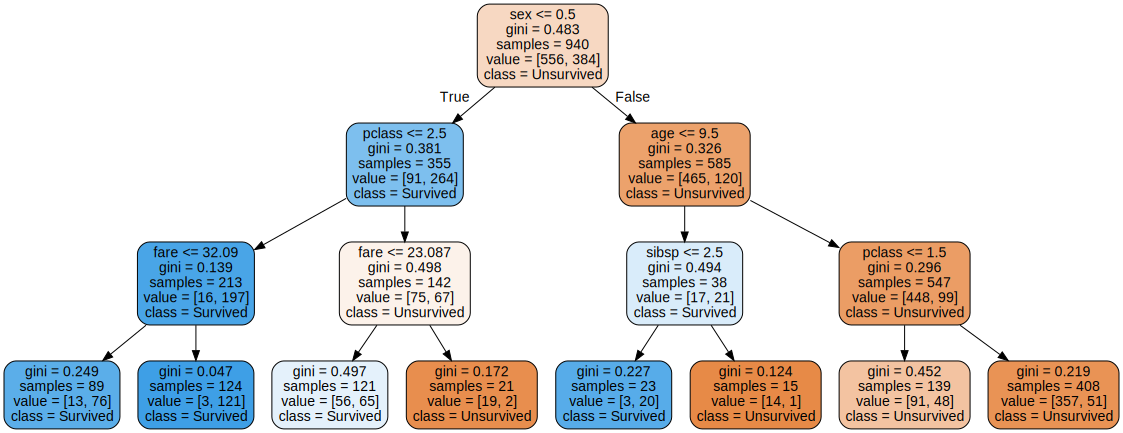

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="titanic.dot",
        feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
        class_names=['Unsurvived','Survived'],
        rounded=True,
        filled=True
    )

import graphviz
with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot

In [ ]:
#      pclass, sex, age, sibsp, parch, fare
dicaprio = [1., 1., 19., 0., 0., 5.]

tree_clf.predict_proba([dicaprio])

# [0.875, 0.125] 비생존확률 / 생존확률
# [0.65467626, 0.34532374]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.65467626, 0.34532374]])

In [ ]:
#      pclass, sex, age, sibsp, parch, fare
winslet = [3., 0., 17., 1., 1., 100.]
tree_clf.predict_proba([winslet])

# [0.02419355, 0.97580645]  비생존확률 / 생존확률
# [0.9047619, 0.0952381]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.9047619, 0.0952381]])